In [1]:
var openDigger = require('../src/open_digger');
var year = 2023, startYear = 2019;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2019, 2020, 2021, 2022, 2023]
var chineseLabel = openDigger.label.getPlatformData([':regions/CN']);
var chineseWhereClause = chineseLabel.map(p => `((repo_id IN (${p.repos.map(r => r.id).join(',')}) AND platform='${p.name}') OR (org_id IN (${p.orgs.map(o => o.id).join(',')}) AND platform='${p.name}'))`).join(' OR ');

# 2024 中国开源发展蓝皮书

## 总体情况

## 全球

通过统计全域 GitHub 事件日志，可以看到近 5 年全球开源的总体活跃情况，各项指标都在明显上升，特别是疫情后，有一个加速上升的趋势。同时活跃仓库数量目前保持着大约 24% 左右的增速，显示了全球开源发展中的增速。

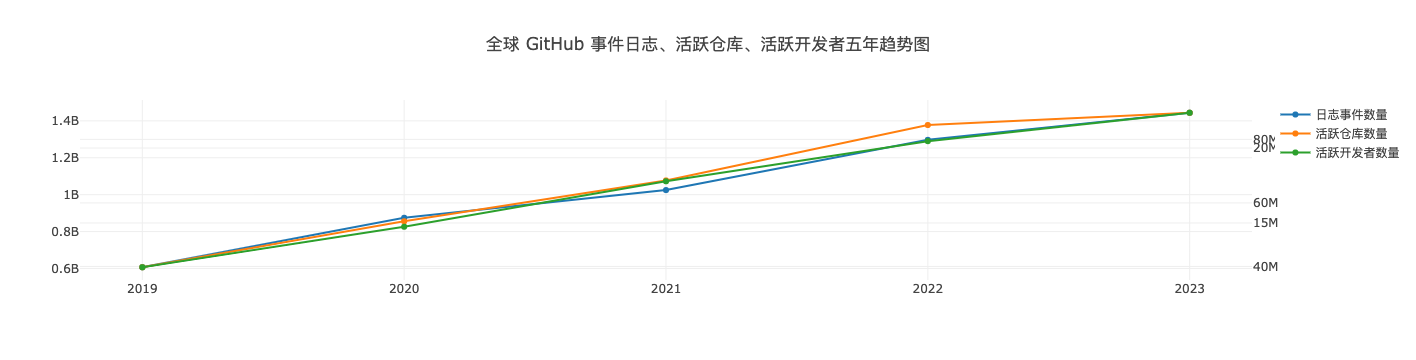

In [2]:
openDigger.driver.clickhouse.query(`SELECT COUNT() AS event_count, COUNT(DISTINCT repo_id) AS active_repo_count, COUNT(DISTINCT actor_id) AS active_actor_count, toYear(created_at) AS year
FROM events WHERE year >= ${startYear} AND year <= ${year} GROUP BY year ORDER BY year`, { format: 'JSONEachRow' }).then(data => {
    var eventCount = [], activeRepoCount = [], activeActorCount = [];
    data.forEach(d => {
        eventCount.push(d.event_count);
        activeRepoCount.push(d.active_repo_count);
        activeActorCount.push(d.active_actor_count);
    });
    openDigger.render.plotly([
        {x: years, y: eventCount, mode: 'scatter', name: '日志事件数量'},
        {x: years, y: activeRepoCount, mode: 'scatter', name: '活跃仓库数量', yaxis: 'y2'},
        {x: years, y: activeActorCount, mode: 'scatter', name: '活跃开发者数量', yaxis: 'y3'},
    ], {
        title: '全球 GitHub 事件日志、活跃仓库、活跃开发者五年趋势图',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

### 中国

此节包含近五年中国项目在 GitHub 日志的事件总量、活跃仓库数量、活跃在中国项目上的开发者总量的变化趋势。

在经历了疫情前后的快速增长后，开始处于一个稳定的增长期。中国在2023年的日志事件和活跃仓库数均有明显的增长，相信在国家各项政策性意见的出台下，中国开源的发展会越来越好。

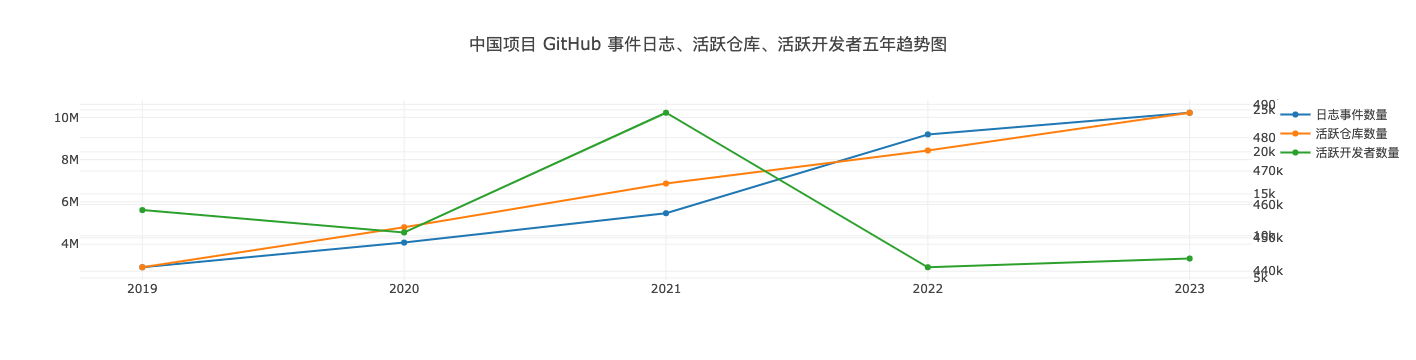

In [2]:
openDigger.driver.clickhouse.query(`SELECT COUNT() AS event_count, COUNT(DISTINCT repo_id) AS active_repo_count, COUNT(DISTINCT actor_id) AS active_actor_count, toYear(created_at) AS year
FROM events WHERE year >= ${startYear} AND year <= ${year} AND (${chineseWhereClause}) GROUP BY year ORDER BY year`, { format: 'JSONEachRow' }).then(data => {
    var eventCount = [], activeRepoCount = [], activeActorCount = [];
    data.forEach(d => {
        eventCount.push(d.event_count);
        activeRepoCount.push(d.active_repo_count);
        activeActorCount.push(d.active_actor_count);
    });
    openDigger.render.plotly([
        {x: years, y: eventCount, mode: 'scatter', name: '日志事件数量'},
        {x: years, y: activeRepoCount, mode: 'scatter', name: '活跃仓库数量', yaxis: 'y2'},
        {x: years, y: activeActorCount, mode: 'scatter', name: '活跃开发者数量', yaxis: 'y3'},
    ], {
        title: '中国项目 GitHub 事件日志、活跃仓库、活跃开发者五年趋势图',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

## 中美企业对比

为了更好的展现中国企业在全球范围下的开源贡献整体水平，本报告通过对比美国头部企业参与开源贡献的数据来进行分析，四张表分别为：美国活跃度排名前十的开源贡献企业、中国活跃度排名前十的开源贡献企业、美国开源影响力排名前十的企业、以及中国开源影响力排名前十的企业。

### 美国企业活跃度 Top 10

In [3]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/US'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '年度活跃度': d.activity[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬────────────┐
│ (index) │ 排名 │    公司     │ 年度活跃度 │
├─────────┼──────┼─────────────┼────────────┤
│    0    │  1   │ 'Microsoft' │ 707350.42  │
│    1    │  2   │  'Google'   │ 305278.19  │
│    2    │  3   │  'Amazon'   │ 281004.18  │
│    3    │  4   │   'Meta'    │ 126941.65  │
│    4    │  5   │ 'HashiCorp' │  86377.44  │
│    5    │  6   │  'Elastic'  │  77990.74  │
│    6    │  7   │  'VMWare'   │  67039.89  │
│    7    │  8   │    'IBM'    │  52737.95  │
│    8    │  9   │   'Intel'   │  47824.42  │
│    9    │  10  │  'Mozilla'  │  47785.58  │
└─────────┴──────┴─────────────┴────────────┘


### 中国企业活跃度 Top 10


In [4]:
openDigger.index.activity.getRepoActivity({
    labelIntersect: [':regions/CN', 'Company'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC'
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '年度活跃度': d.activity[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬────────────┐
│ (index) │ 排名 │    公司     │ 年度活跃度 │
├─────────┼──────┼─────────────┼────────────┤
│    0    │  1   │  'Huawei'   │ 304983.23  │
│    1    │  2   │  'Alibaba'  │ 120768.83  │
│    2    │  3   │   'Baidu'   │  68253.86  │
│    3    │  4   │ 'Ant group' │  63932.24  │
│    4    │  5   │  'PingCAP'  │  31900.23  │
│    5    │  6   │ 'ByteDance' │  27730.44  │
│    6    │  7   │  'Tencent'  │  26785.78  │
│    7    │  8   │ 'ESPRESSIF' │  20026.02  │
│    8    │  9   │ 'Fit2Cloud' │  17804.89  │
│    9    │  10  │  'Deepin'   │  15393.99  │
└─────────┴──────┴─────────────┴────────────┘


### 美国企业影响力 Top 10

可以看出微软公司的企业影响力远大于其它公司。

In [6]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/US'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '影响力': d.openrank[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬───────────┐
│ (index) │ 排名 │    公司     │  影响力   │
├─────────┼──────┼─────────────┼───────────┤
│    0    │  1   │ 'Microsoft' │ 212472.82 │
│    1    │  2   │  'Google'   │ 83583.14  │
│    2    │  3   │  'Amazon'   │ 70384.16  │
│    3    │  4   │   'Meta'    │ 39012.84  │
│    4    │  5   │ 'HashiCorp' │ 23037.88  │
│    5    │  6   │  'Elastic'  │  21800.4  │
│    6    │  7   │  'VMWare'   │ 19959.02  │
│    7    │  8   │   'Intel'   │   17210   │
│    8    │  9   │    'IBM'    │ 16399.36  │
│    9    │  10  │  'Mozilla'  │ 12425.06  │
└─────────┴──────┴─────────────┴───────────┘


### 中国企业影响力 Top 10

In [7]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/CN', 'Company'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '影响力': d.openrank[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬──────────┐
│ (index) │ 排名 │    公司     │  影响力  │
├─────────┼──────┼─────────────┼──────────┤
│    0    │  1   │  'Huawei'   │ 69986.51 │
│    1    │  2   │  'Alibaba'  │ 31311.08 │
│    2    │  3   │   'Baidu'   │ 23678.49 │
│    3    │  4   │ 'Ant group' │ 19223.05 │
│    4    │  5   │  'Tencent'  │ 9324.73  │
│    5    │  6   │ 'ByteDance' │ 8147.01  │
│    6    │  7   │  'PingCAP'  │ 7251.06  │
│    7    │  8   │ 'ESPRESSIF' │ 6650.36  │
│    8    │  9   │ 'Fit2Cloud' │ 5450.08  │
│    9    │  10  │ 'StarRocks' │ 3665.23  │
└─────────┴──────┴─────────────┴──────────┘


### 近五年中国企业活跃度 Top 10

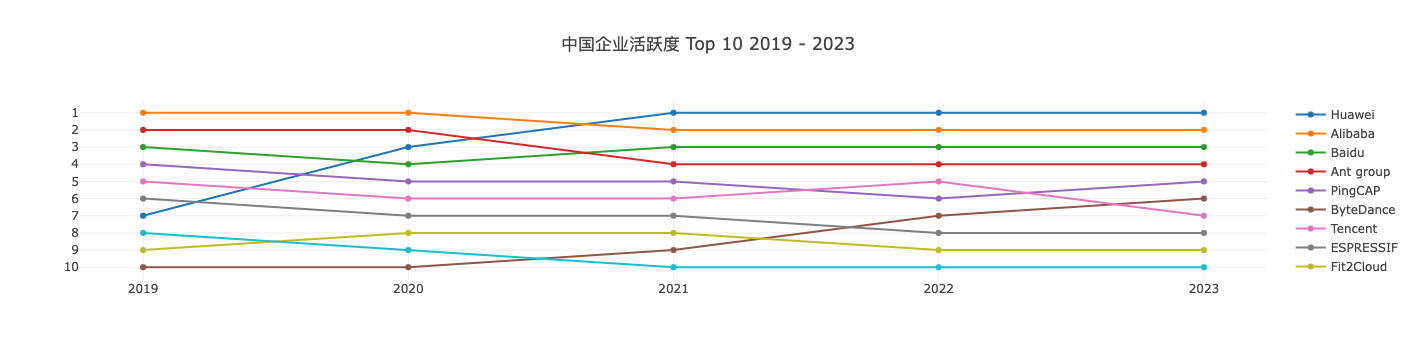

In [8]:
openDigger.index.activity.getRepoActivity({
    labelIntersect: [':regions/CN', 'Company'],
    startYear, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year', order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.activity).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国企业活跃度 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 } })
})

### 近五年中国企业影响力 Top 10

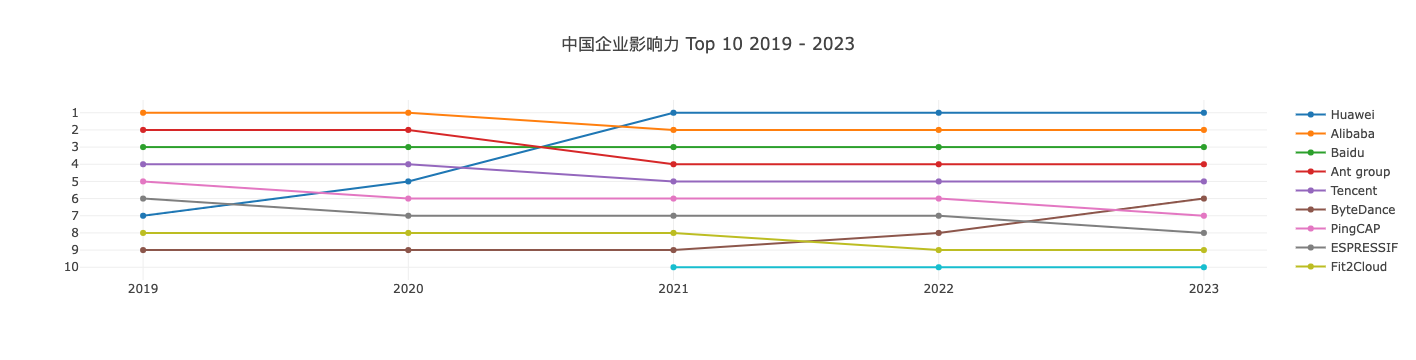

In [9]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/CN', 'Company'],
    startYear, endYear: year,
    endMonth: 12, groupBy: 'Company',
    groupTimeRange: 'year', order : 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.openrank).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }),{title: `中国企业影响力 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 } })
})

## 中国项目情况

在开源项目洞察这块，同样根据活跃度和影响力，分别比较了全球和中国排名前 20 的开源项目

### GitHub 全球项目活跃度 Top 20

In [10]:
openDigger.index.activity.getRepoActivity({
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        activity: d.activity[0],
        issue_comment: d.issue_comment[0],
        open_issue: d.open_issue[0],
        open_pull: d.open_pull[0],
        review_comment: d.review_comment[0],
        merged_pull: d.merged_pull[0],
    };
})));

┌─────────┬─────────────────────────────────────────────────────────────────────┬──────────┬───────────────┬────────────┬───────────┬────────────────┬─────────────┐
│ (index) │                                name                                 │ activity │ issue_comment │ open_issue │ open_pull │ review_comment │ merged_pull │
├─────────┼─────────────────────────────────────────────────────────────────────┼──────────┼───────────────┼────────────┼───────────┼────────────────┼─────────────┤
│    0    │                         'ghscr/ghscription'                         │ 86763.63 │    '11354'    │  '383470'  │    '2'    │      '0'       │     '1'     │
│    1    │                           'NixOS/nixpkgs'                           │ 56623.46 │   '115686'    │   '5586'   │  '59028'  │    '52717'     │   '51869'   │
│    2    │                        'home-assistant/core'                        │  44216   │   '104481'    │   '8974'   │  '11306'  │    '31484'     │   '9768'    │
│    3    

### GitHub 中国项目活跃度 Top 20

In [11]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/CN'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        activity: d.activity[0],
        issue_comment: d.issue_comment[0],
        open_issue: d.open_issue[0],
        open_pull: d.open_pull[0],
        review_comment: d.review_comment[0],
        merged_pull: d.merged_pull[0],
    };
})));

┌─────────┬──────────────────────────────────┬──────────┬───────────────┬────────────┬───────────┬────────────────┬─────────────┐
│ (index) │               name               │ activity │ issue_comment │ open_issue │ open_pull │ review_comment │ merged_pull │
├─────────┼──────────────────────────────────┼──────────┼───────────────┼────────────┼───────────┼────────────────┼─────────────┤
│    0    │      'mindspore/mindspore'       │ 16028.37 │    '30162'    │   '1067'   │  '16359'  │      '0'       │   '12825'   │
│    1    │        'openharmony/docs'        │ 15969.05 │    '35703'    │   '301'    │  '19386'  │      '0'       │   '15998'   │
│    2    │      'PaddlePaddle/Paddle'       │ 13865.37 │    '25371'    │   '1661'   │  '8529'   │    '15282'     │   '6419'    │
│    3    │          'apache/doris'          │ 12290.44 │    '82703'    │   '1482'   │  '10927'  │    '15334'     │   '9134'    │
│    4    │  'openharmony/arkui_ace_engine'  │ 11985.97 │    '11084'    │   '529'    │  '1

### GitHub 全球项目影响力 Top 20

In [12]:
openDigger.index.openrank.getRepoOpenrank({
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        open_rank: d.openrank[0],
    };
})));

┌─────────┬──────────────────────────────────────────┬───────────┐
│ (index) │                   name                   │ open_rank │
├─────────┼──────────────────────────────────────────┼───────────┤
│    0    │             'NixOS/nixpkgs'              │ 22133.13  │
│    1    │          'home-assistant/core'           │ 15399.77  │
│    2    │            'microsoft/vscode'            │ 13167.44  │
│    3    │        'MicrosoftDocs/azure-docs'        │ 10230.56  │
│    4    │            'pytorch/pytorch'             │ 10106.29  │
│    5    │           'godotengine/godot'            │  9742.78  │
│    6    │  'elidianaandrade/dio-lab-open-source'   │  9552.18  │
│    7    │               'odoo/odoo'                │  9233.43  │
│    8    │            'flutter/flutter'             │  9230.84  │
│    9    │         'microsoft/winget-pkgs'          │  8264.19  │
│   10    │       'zephyrproject-rtos/zephyr'        │  7939.92  │
│   11    │             'elastic/kibana'             │  7561.9

### GitHub 中国项目影响力 Top 20

In [13]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/CN'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        open_rank: d.openrank[0],
    };
})));

┌─────────┬──────────────────────────────────┬───────────┐
│ (index) │               name               │ open_rank │
├─────────┼──────────────────────────────────┼───────────┤
│    0    │      'mindspore/mindspore'       │  7412.06  │
│    1    │      'PaddlePaddle/Paddle'       │  5393.8   │
│    2    │          'apache/doris'          │  4262.44  │
│    3    │        'openharmony/docs'        │  3990.5   │
│    4    │  'openharmony/arkui_ace_engine'  │  3328.36  │
│    5    │      'StarRocks/starrocks'       │  3167.61  │
│    6    │     'ant-design/ant-design'      │  3022.38  │
│    7    │          'pingcap/tidb'          │  2186.94  │
│    8    │       'espressif/esp-idf'        │  2132.46  │
│    9    │        'milvus-io/milvus'        │  1973.63  │
│   10    │          'apache/flink'          │  1787.59  │
│   11    │       'taosdata/TDengine'        │  1688.05  │
│   12    │     'apache/shardingsphere'      │  1661.84  │
│   13    │     'PaddlePaddle/PaddleNLP'     │  1653.6  

### 近五年中国活跃度 Top 10 项目变化趋势图

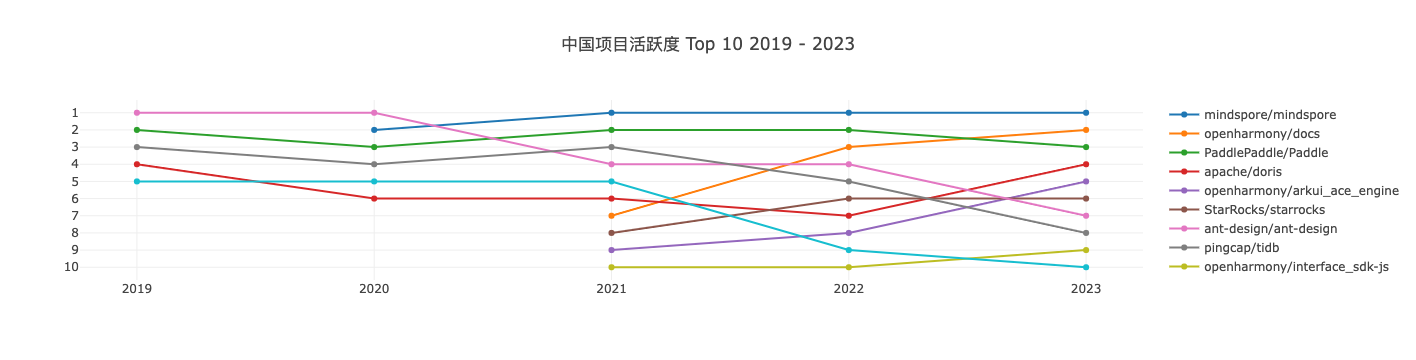

In [14]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/CN'],
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.activity).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国项目活跃度 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 }  })
});

### 近五年中国影响力 Top 10 项目变化趋势图

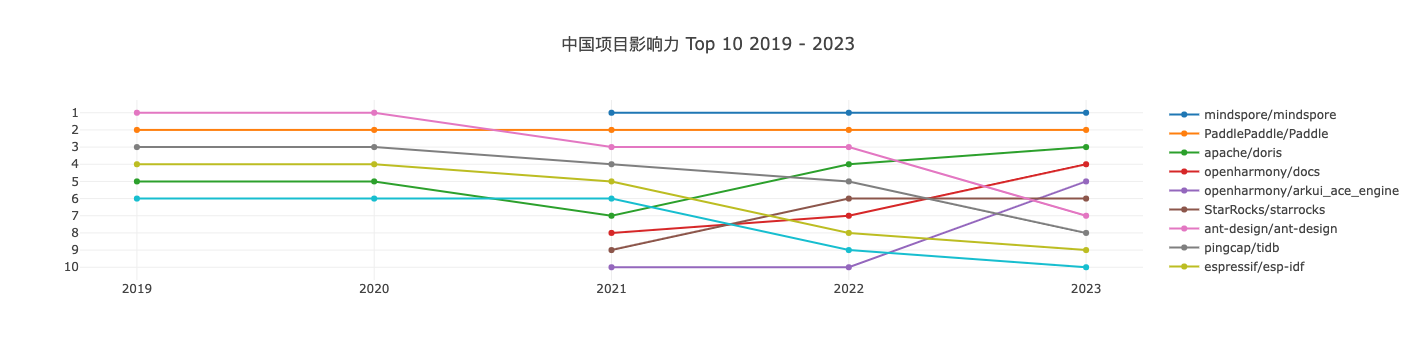

In [15]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/CN'],
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.openrank).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国项目影响力 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 }  })
});